In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

1. ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

In [2]:
df= pd.read_csv("continentes_sin_nulos.csv", index_col=0)
df.head(5)

,country,density,abbreviation,agriculturalland,capital/majorcity,currency-code,forestedarea,grossprimaryeducationenrollment,largestcity,officiallanguage,populationlaborforceparticipation,taxrevenue,latitude,longitude,Continent,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
0,Afghanistan,60.0,AF,58.1,Kabul,AFN,2.1,104.0,Kabul,Pashto,48.90,9.3,33.939110,67.709953,Asia,0.70,64.500000,652230.0,323000.0,32.49,93.0,8672.0,149.900,2.30,4.47,1.910135e+10,9.70,47.9,638.0,0.43,78.4,38041754.0,71.40,11.120,9797273.0
1,Albania,105.0,AL,43.1,Tirana,ALL,28.1,107.0,Tirana,Albanian,55.70,18.6,41.153332,20.168331,Europa,1.36,78.500000,28748.0,9000.0,11.78,355.0,4536.0,119.050,1.40,1.62,1.527808e+10,55.00,7.8,15.0,1.12,56.9,2854191.0,36.60,12.330,1747593.0
2,Algeria,18.0,DZ,17.4,Algiers,DZD,0.8,109.9,Algiers,Arabic,41.20,37.2,28.033886,1.659626,Asia,0.28,76.700000,2381741.0,317000.0,24.28,213.0,150006.0,151.360,2.00,3.02,1.699882e+11,51.40,20.1,112.0,0.95,28.1,43053054.0,66.10,11.700,31510100.0
3,Andorra,164.0,AD,40.0,Andorra la Vella,EUR,34.0,106.4,Andorra la Vella,Catalan,62.45,16.3,42.506285,1.521801,Europa,1.51,80.442372,468.0,10800.0,7.20,376.0,469.0,169.706,6.82,1.27,3.154058e+09,9.82,2.7,436.8,6.63,36.4,77142.0,34.84,8.058,67873.0
4,Angola,26.0,AO,47.5,Luanda,AOA,46.3,113.5,Luanda,Portuguese,77.50,9.2,-11.202692,17.873887,Africa,0.97,60.800000,1246700.0,117000.0,40.73,244.0,34693.0,261.730,17.10,5.52,9.463542e+10,9.30,51.6,241.0,0.71,33.4,31825295.0,49.10,6.890,21061025.0


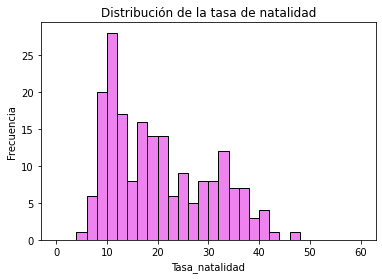

In [42]:
plt.hist(x = "birthrate_k", 
         data = df, 
         bins = 30, 
         color = "violet", 
         edgecolor = "black", 
         range = [0, 60])

plt.title("Distribución de la tasa de natalidad")
plt.xlabel("Tasa_natalidad")
plt.ylabel("Frecuencia");

2. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

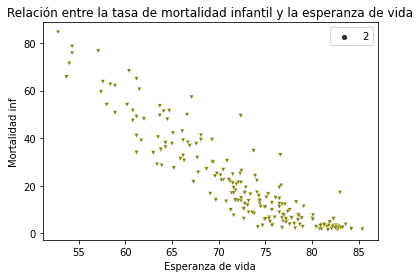

In [53]:
sns.scatterplot(x = "lifeexpectancy_i", 
                y = "infantmortality_k", 
                data = df,
                size = 2,
                marker= "v",  
                color = "olive")

plt.title("Relación entre la tasa de mortalidad infantil y la esperanza de vida")
plt.xlabel("Esperanza de vida")
plt.ylabel("Mortalidad inf");

cuanto mayor es la tasa de mortalidad infantil, es menor la esperanza de vida

3. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.
Asia

In [60]:
df_continent = df.groupby("Continent")["country"].count().reset_index()

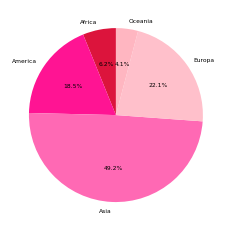

In [67]:
colores = [ "crimson", "deeppink", "hotpink", "pink", "lightpink"]
plt.pie("country",
        labels = "Continent", 
        data = df_continent,
        autopct = '%1.1f%%', 
        colors = colores,
        textprops = {'fontsize': 6}, 
        startangle = 90);

4. ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.

In [45]:
europa = df['Continent'] == "Europa"
df_europa = df[europa]

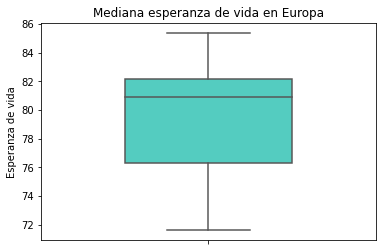

In [46]:
sns.boxplot(y = "lifeexpectancy_i", 
            data = df_europa, 
            width = 0.5, 
            color = "turquoise", 
            )
plt.title("Mediana esperanza de vida en Europa")
plt.ylabel("Esperanza de vida");

5. ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

6. ¿Cuáles son los 10 países con la mayor área forestal?

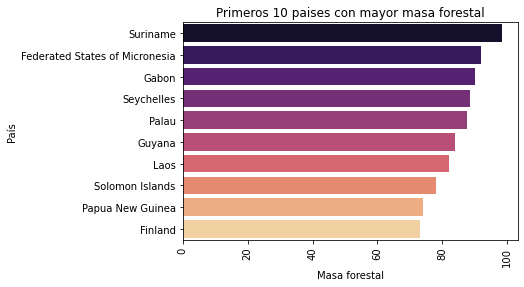

In [66]:
df_forestarea = df.sort_values(by = ["forestedarea"], ascending = False).head(10)
sns.barplot(x="forestedarea", 
            y="country",
            palette = "magma",
            data = df_forestarea)

plt.xticks(rotation = 90)

plt.title("Primeros 10 paises con mayor masa forestal")
plt.xlabel("Masa forestal")
plt.ylabel("País");

7. ¿Existen diferencias notables en la distribución de la tasa de natalidad entre continentes?

8. ¿Cómo se relacionan el CPI y el precio de la gasolina? Crea un scatter plot que muestre esta relación y agrega una línea para visualizar la tendencia. Ajusta los valores del CPI entre 100 y 300.

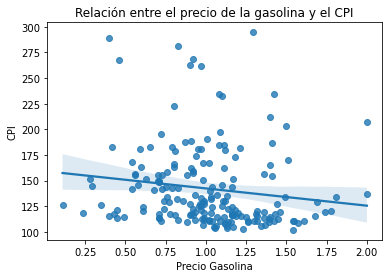

In [48]:
df_cpi = df[df["cpi_k"].between(100,300)]

sns.regplot(x = "gasolineprice_i",
            y = "cpi_k",
            data = df_cpi)

plt.title("Relación entre el precio de la gasolina y el CPI")
plt.xlabel("Precio Gasolina")
plt.ylabel("CPI");

9. ¿Cómo varía la esperanza de vida entre los diferentes países de Oceanía? Utiliza un diagrama de violín para representar la distribución de la esperanza de vida en función del idioma oficial de cada país.

10. Queremos analizar la relación entre la tasa de impuestos total, el PIB per cápita y la tasa de alfabetización. Crea un conjunto de subplots con tres gráficas:
- Un scatter plot que muestre la relación entre el PIB per cápita y el CPI.
- Un histograma de la tasa de impuestos total.
- Un gráfico de barras que resuma la tasa de impuestos total por continente.

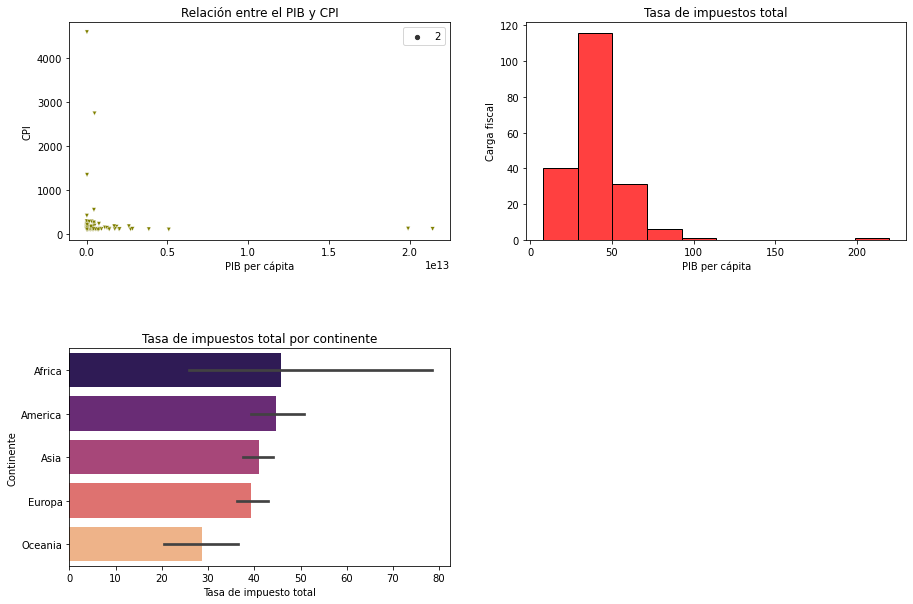

In [65]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

axes = axes.flat

axes[3].axis('off')

sns.scatterplot(x= 'gdp_k',
            y = "cpi_k", 
            data = df,
            size = 2,
            marker= "v",  
            color = "olive", 
            ax = axes[0])

axes[0].set_title("Relación entre el PIB y CPI")
axes[0].set_xlabel("PIB per cápita")
axes[0].set_ylabel("CPI")


sns.histplot( x= 'totaltaxrate_k',
             data = df,
             bins = 10,
             color = 'r',
             ax = axes[1])

axes[1].set_title("Tasa de impuestos total")
axes[1].set_xlabel("PIB per cápita")
axes[1].set_ylabel("Carga fiscal")

sns.barplot(x='totaltaxrate_k', 
            y='Continent', 
            data = df,
            palette = "magma",
            order = ['Africa', 'America', 'Asia', 'Europa', 'Oceania'],
            ax = axes[2])

axes[2].set_title("Tasa de impuestos total por continente")
axes[2].set_ylabel("Continente")
axes[2].set_xlabel("Tasa de impuesto total")

plt.subplots_adjust(hspace=0.5);

En los scatterplot los puntos deben tener un tamaño de 2.
En los scatterplot los puntos deben tener un color diferente al azul.
En los barplot las barras siempre tienen que estar ordenadas de mayor a menor.
En los barplot y countplot las barras tienen que tener un color diferente a los que vienen por defecto.
En los pieplot los quesitos deben tener unos colores diferentes a los que vienen por defecto.
En los pieplot siempre tenemos que añadir la etiqueta de a que % corresponde cada quesito.
En los pieplot el tamaño de los % tiene que ser de 6.